# 📘 Medical Insurance Cost Prediction using Linear Regression

In [2]:
# importing required linraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the dataset

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Exlporing the data

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


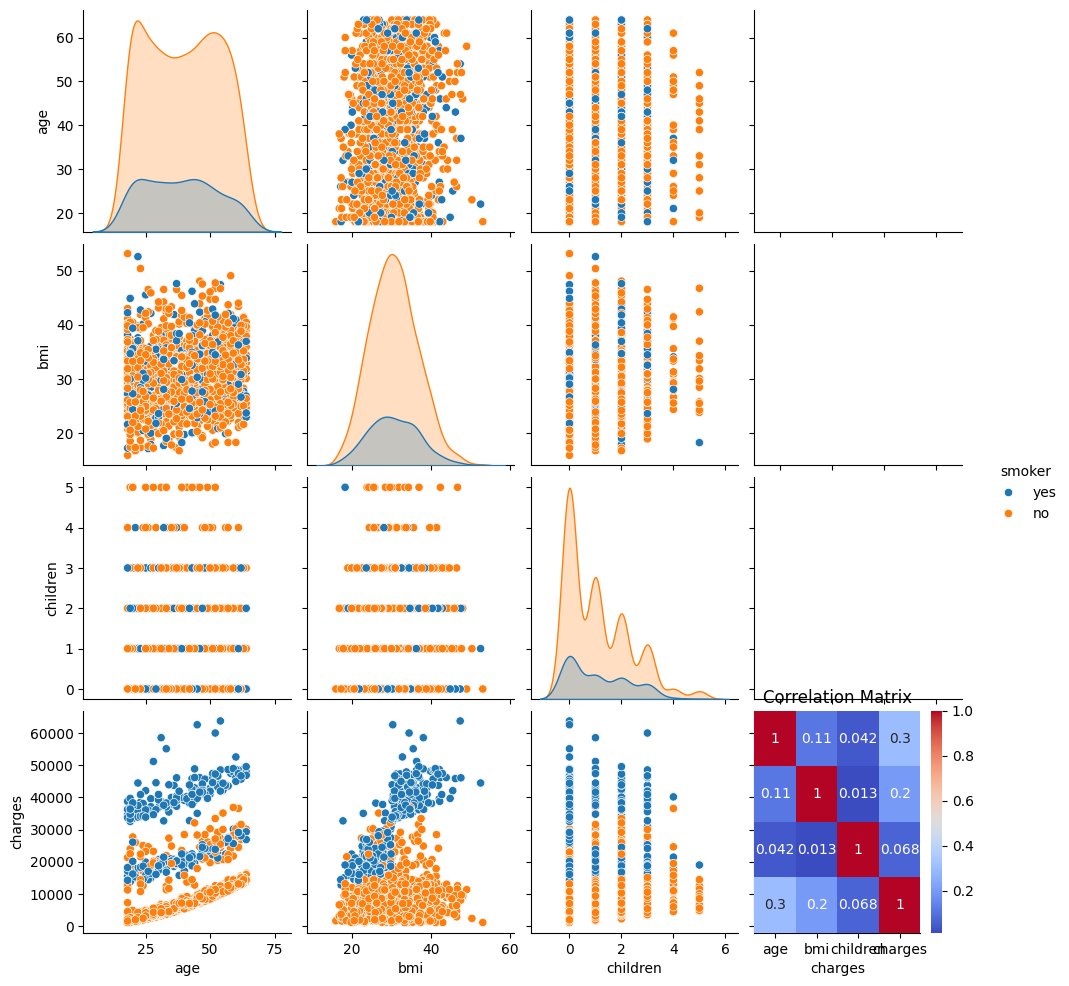

In [7]:
# Vusalizations 

sns.pairplot(df, hue="smoker")

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Preprocessing the data

X = df.drop("charges", axis=1)
y = df["charges"]

categorical = ["sex", "smoker", "region"]
numerical = ["age","bmi","children"]

preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), categorical),
    ("scaler", StandardScaler(), numerical)
    
])

In [9]:
# Building the pipeline

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [13]:
# Train-Test Split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())])

In [15]:
# Making predections

y_pred = model.predict(X_test)

In [16]:
# Evaluating the model

print("R2_score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2_score: 0.734703996892434
MSE: 38291133.012902625


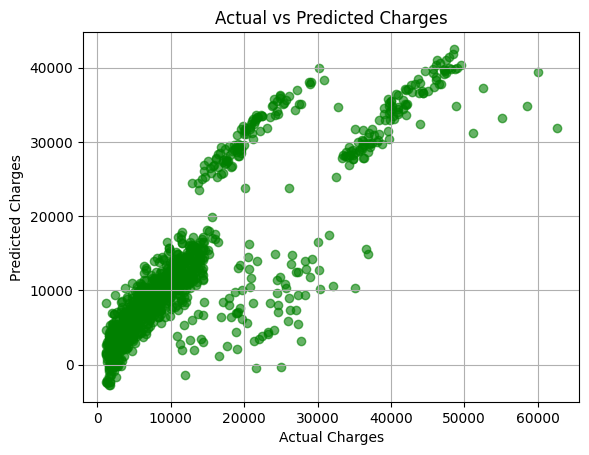

In [18]:
# Ploting Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6, color="green")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.show()

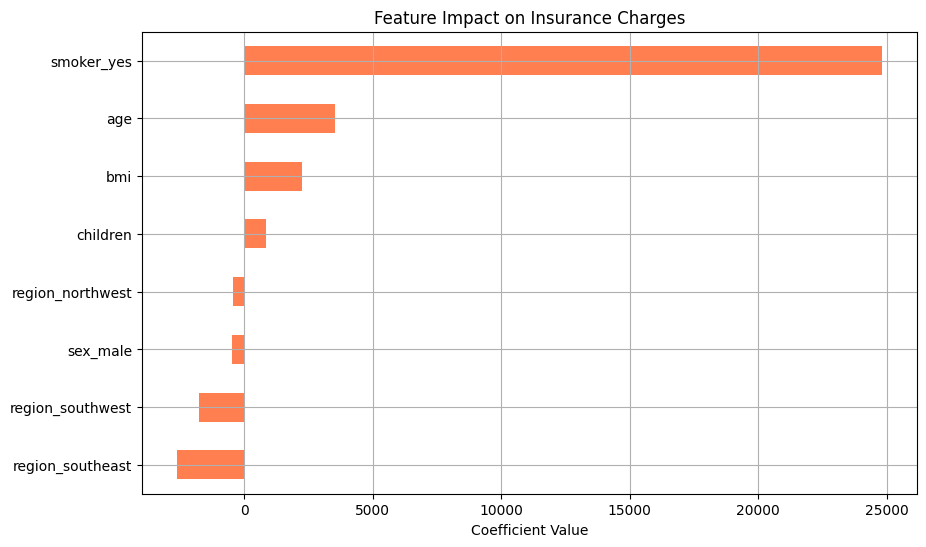

In [19]:
# Coefficient Interpretation

regressor = model.named_steps["regressor"]
encoded_features = model.named_steps["preprocessor"].transformers_[0][1].get_feature_names_out(categorical)
scaled_features = numerical
all_features = np.concatenate((encoded_features, scaled_features))

coefficients = pd.Series(regressor.coef_, index=all_features)
coefficients.sort_values().plot(kind="barh", figsize=(10,6), color="coral")
plt.title("Feature Impact on Insurance Charges")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()


In [20]:
# Predicting New Data
sample = pd.DataFrame({
    "age": [28],
    "sex": ["female"],
    "bmi": [26.5],
    "children": [1],
    "smoker": ["no"],
    "region": ["northeast"]
})

predicted_charge = model.predict(sample)
print(f"\nPredicted Insurance Charge: ${predicted_charge[0]:.2f}")


Predicted Insurance Charge: $5154.32


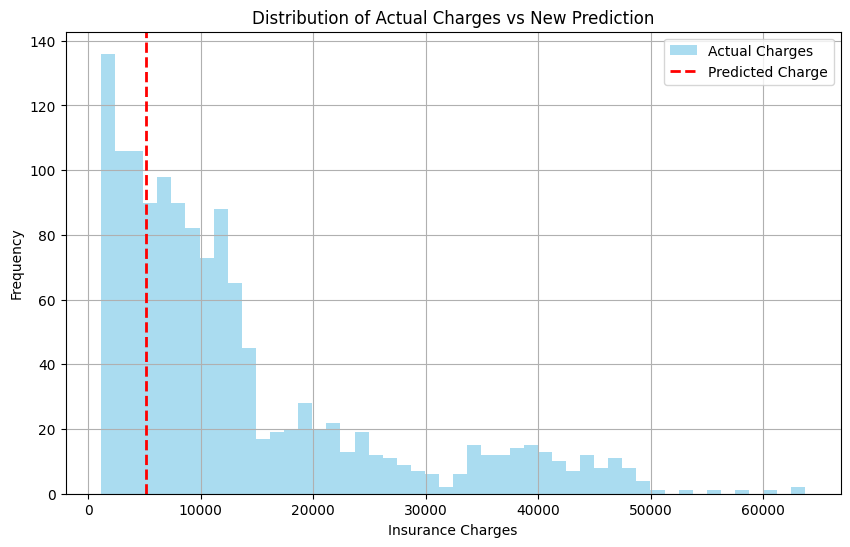

In [21]:
# Visualize New Prediction vs Actual Dataset


plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, alpha=0.7, label="Actual Charges", color="skyblue")
plt.axvline(predicted_charge[0], color="red", linestyle="--", linewidth=2, label="Predicted Charge")
plt.title("Distribution of Actual Charges vs New Prediction")
plt.xlabel("Insurance Charges")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
